In [27]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

In [29]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Display the first few rows of the DataFrame to understand the data
print("Original DataFrame:")
print(df.head())

# Filter out rows with non-numeric values
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Remove 0 and negative values
df_cleaned = df_numeric[df_numeric > 0].dropna()

# Display the first few rows of the DataFrame after removing 0 and negative values
print("\nDataFrame after removing 0 and negative values:")
print(df_cleaned.head())


Original DataFrame:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

DataFrame after removing 0 and negative values:
      N   P   K  temperature   humidity        ph    rainfall
0  90.0  42  43    20.879744  82.002744  6.502985  202.935536
1  85.0  58  41    21.770462  80.319644  7.038096  226.655537
2  60.0  55  44    23.004459  82.320763  7.840207  263.964248
3  74.0  35  40    26.491096  80.158363  6.980401  242.864034
4  78.0  42  42    20.130175  81.604873  7.628473  262.717340


In [30]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [31]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [32]:
df.size

17600

In [33]:
df.shape

(2200, 8)

In [34]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [35]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [36]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [37]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot: >

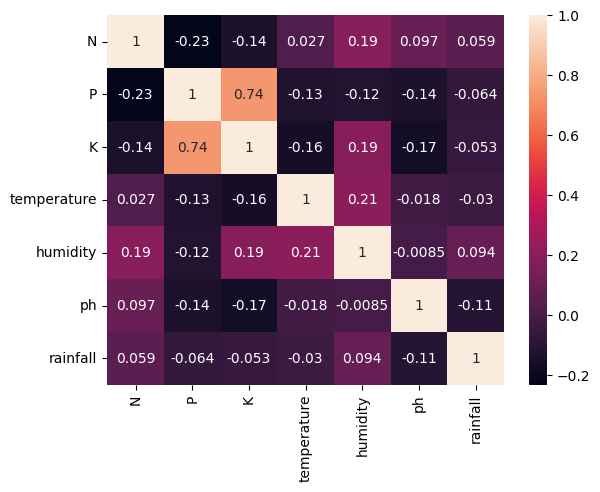

In [38]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [39]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [40]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [41]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)


In [45]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# Guassian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [47]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

# Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.95      0.98        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.83      0.89      0.86        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [49]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.98863636, 0.98863636, 0.98181818])

In [50]:
#Saving trained SVM model

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [52]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators=20, random_state=0)
Random_Forest.fit(Xtrain,Ytrain)

predicted_values = Random_Forest.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Random Forest')
print("Random_Forest's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Random_Forest's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00

## Accuracy Comparison

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

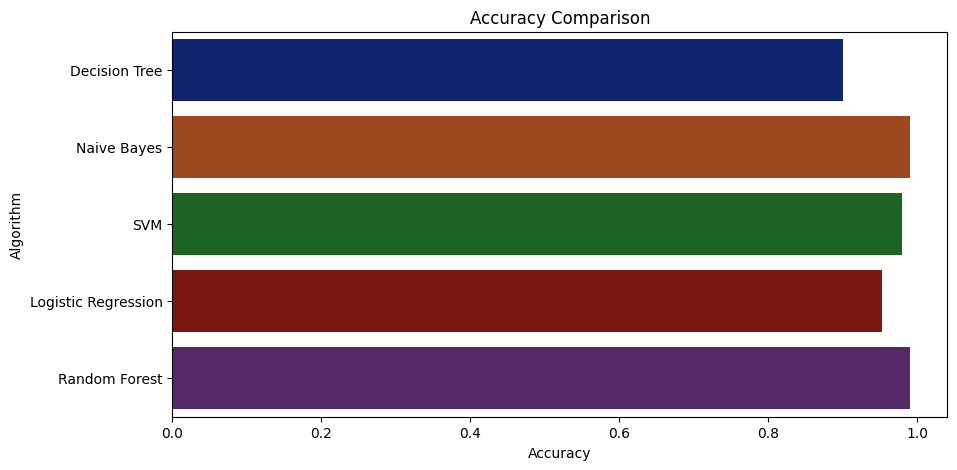

In [54]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [55]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9795454545454545
Logistic Regression --> 0.9522727272727273
Random Forest --> 0.990909090909091


## Crop Suitability Prediction with Various ML Algorithms

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Separate features and target labels
features = data.drop(columns=["label"])
labels = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression:

In [57]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9636
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 20  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  1  0  0  

###  Naive Bayes:

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Separate features and target labels
features = data.drop(columns=["label"])
labels = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))


Naive Bayes Accuracy: 0.9955
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0 

### Support Vector Machines:

In [59]:
from sklearn.svm import SVC

# Train the model
model = SVC(kernel="linear")
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))


SVM Accuracy: 0.9773
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0

### Random Forest:

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.9932
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  0  0  0  0  0  0]
 [ 

## Decision Tree

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Separate features and target labels
features = data.drop(columns=["label"])
labels = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 0.9864
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0]
 [ 

## Performance Evaluation

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Separate features and target labels
features = data.drop(columns=["label"])
labels = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label encode target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define models and store results
models = {}
models["Logistic Regression"] = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=42)
models["Naive Bayes"] = GaussianNB()
models["SVM"] = SVC(kernel="linear")
models["Random Forest"] = RandomForestClassifier(n_estimators=100)
models["Decision Tree"] = DecisionTreeClassifier(random_state=42)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_encoded)

    # Make predictions
    y_pred_encoded = model.predict(X_test_scaled)

    # Decode predictions
    y_pred = le.inverse_transform(y_pred_encoded)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # Store results
    models[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    }

# Print the full metrics dictionary
print("Full Metrics: \n")
for model_name, model_metrics in models.items():
    print(f"\nModel: {model_name}")
    for metric, value in model_metrics.items():
        print(f"{metric}: {value}")


Full Metrics: 


Model: Logistic Regression
Accuracy: 0.9636363636363636
Precision: 0.9644420567548909
Recall: 0.9636363636363636
F1 Score: 0.9635115059268676

Model: Naive Bayes
Accuracy: 0.9954545454545455
Precision: 0.9958181818181817
Recall: 0.9954545454545455
F1 Score: 0.9954229797979799

Model: SVM
Accuracy: 0.9772727272727273
Precision: 0.9787326467724194
Recall: 0.9772727272727273
F1 Score: 0.9770616589588196

Model: Random Forest
Accuracy: 0.9931818181818182
Precision: 0.9937348484848485
Recall: 0.9931818181818182
F1 Score: 0.9931754816901672

Model: Decision Tree
Accuracy: 0.9863636363636363
Precision: 0.9868055555555556
Recall: 0.9863636363636363
F1 Score: 0.9863152866630287


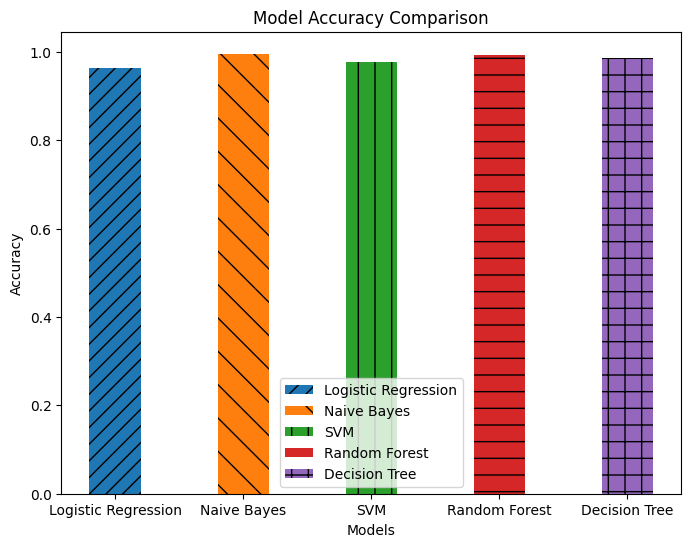

In [63]:
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Separate features and target labels
features = data.drop(columns=["label"])
labels = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label encode target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define models and store results
models = {}
models["Logistic Regression"] = LogisticRegression(solver="lbfgs", multi_class="multinomial", random_state=42)
models["Naive Bayes"] = GaussianNB()
models["SVM"] = SVC(kernel="linear")
models["Random Forest"] = RandomForestClassifier(n_estimators=100)
models["Decision Tree"] = DecisionTreeClassifier(random_state=42)

# Create a dictionary to store model names and accuracy values
model_names = list(models.keys())
accuracy_values = []

# Calculate accuracy for each model and store it in the dictionary
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    y_pred_encoded = model.predict(X_test_scaled)
    y_pred = le.inverse_transform(y_pred_encoded)
    accuracy = accuracy_score(y_test, y_pred)
    models[model_name] = accuracy
    accuracy_values.append(accuracy)

# Create a bar chart with reduced width and hatching styles
fig, ax = plt.subplots(figsize=(8, 6))

# Define hatching styles
hatch_styles = cycle(['//', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'])

# Plot bars with model names, accuracy values, and hatching styles
for model_name, accuracy, hatch in zip(model_names, accuracy_values, hatch_styles):
    ax.bar(model_name, accuracy, hatch=hatch, label=model_name, width=0.4)

# Set chart title and labels
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")

# Add legend
plt.legend()

# Show the bar chart
plt.show()


### Crop Yield Prediction

In [64]:
from sklearn.metrics import mean_squared_error, r2_score


## Random Forest

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define data path
data_path = 'C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv'

# Load data
data = pd.read_csv(data_path)

# Feature selection
features = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]
target = "label"

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label encode target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_encoded)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test_encoded, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_encoded, y_pred_rf)
print("\nRandom Forest Regressor:")
print(f"Mean squared error: {mse_rf}")
print(f"Root mean squared error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

# Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train_encoded)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test_encoded, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_encoded, y_pred_svr)
print("\nSupport Vector Regressor:")
print(f"Mean squared error: {mse_svr}")
print(f"Root mean squared error: {rmse_svr}")
print(f"R-squared: {r2_svr}")

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train_encoded)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test_encoded, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_encoded, y_pred_lr)
print("\nLogistic Regression:")
print(f"Mean squared error: {mse_lr}")
print(f"Root mean squared error: {rmse_lr}")
print(f"R-squared: {r2_lr}")

# Naive Bayes for Regression (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train_encoded)
y_pred_nb = nb_model.predict(X_test_scaled)
mse_nb = mean_squared_error(y_test_encoded, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)
r2_nb = r2_score(y_test_encoded, y_pred_nb)
print("\nNaive Bayes for Regression:")
print(f"Mean squared error: {mse_nb}")
print(f"Root mean squared error: {rmse_nb}")
print(f"R-squared: {r2_nb}")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train_encoded)
y_pred_dt = dt_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test_encoded, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test_encoded, y_pred_dt)
print("\nDecision Tree Regressor:")
print(f"Mean squared error: {mse_dt}")
print(f"Root mean squared error: {rmse_dt}")
print(f"R-squared: {r2_dt}")



Random Forest Regressor:
Mean squared error: 2.3923602272727273
Root mean squared error: 1.5467256470598552
R-squared: 0.9434749852664985

Support Vector Regressor:
Mean squared error: 7.954055089902932
Root mean squared error: 2.820293440389303
R-squared: 0.812067147738704

Logistic Regression:
Mean squared error: 3.672727272727273
Root mean squared error: 1.916436086262016
R-squared: 0.9132233679374844

Naive Bayes for Regression:
Mean squared error: 0.6545454545454545
Root mean squared error: 0.8090398349558905
R-squared: 0.9845348576522249

Decision Tree Regressor:
Mean squared error: 2.090909090909091
Root mean squared error: 1.4459976109624424
R-squared: 0.9505974619446074


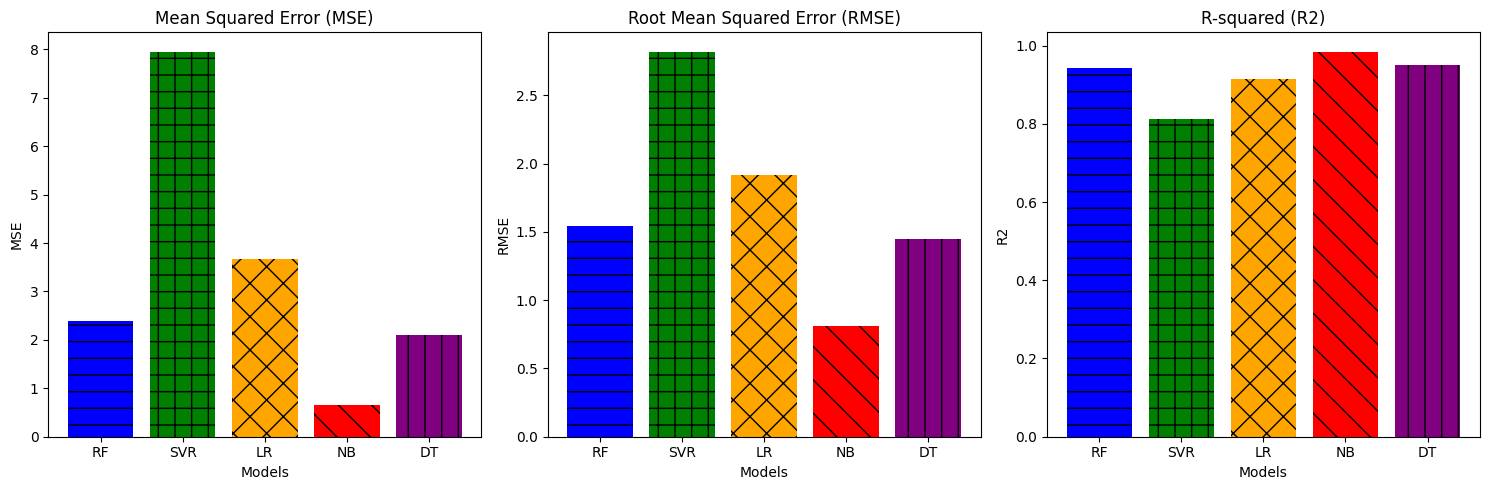

In [71]:
import matplotlib.pyplot as plt

# Metrics for each model
model_names = ['RF', 'SVR', 'LR', 'NB', 'DT']
mse_values = [mse_rf, mse_svr, mse_lr, mse_nb, mse_dt]
rmse_values = [rmse_rf, rmse_svr, rmse_lr, rmse_nb, rmse_dt]
r2_values = [r2_rf, r2_svr, r2_lr, r2_nb, r2_dt]

# Define unique styles for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple']
hatch_styles = ['-', '+', 'x', '\\', '|']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Bar chart for Mean Squared Error (MSE)
axes[0].bar(model_names, mse_values, color=colors, hatch=hatch_styles)
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_xlabel('Models')
axes[0].set_ylabel('MSE')

# Bar chart for Root Mean Squared Error (RMSE)
axes[1].bar(model_names, rmse_values, color=colors, hatch=hatch_styles)
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_xlabel('Models')
axes[1].set_ylabel('RMSE')

# Bar chart for R-squared (R2)
axes[2].bar(model_names, r2_values, color=colors, hatch=hatch_styles)
axes[2].set_title('R-squared (R2)')
axes[2].set_xlabel('Models')
axes[2].set_ylabel('R2')

plt.tight_layout()
plt.show()


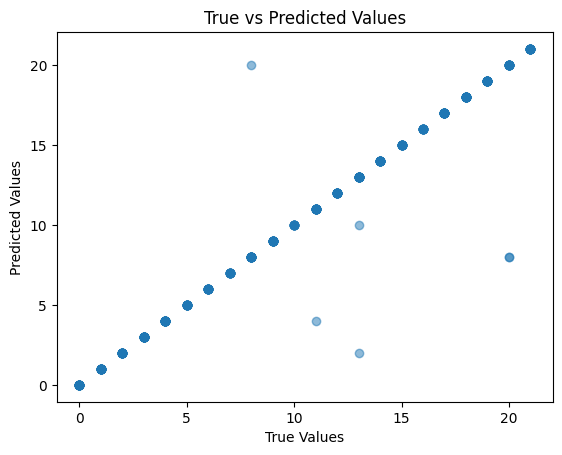

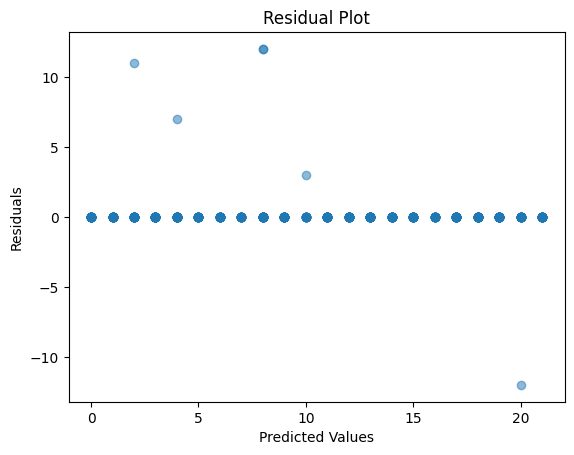

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of true vs predicted values
plt.scatter(y_test_encoded, y_pred_encoded, alpha=0.5)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test_encoded - y_pred_encoded
plt.scatter(y_pred_encoded, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


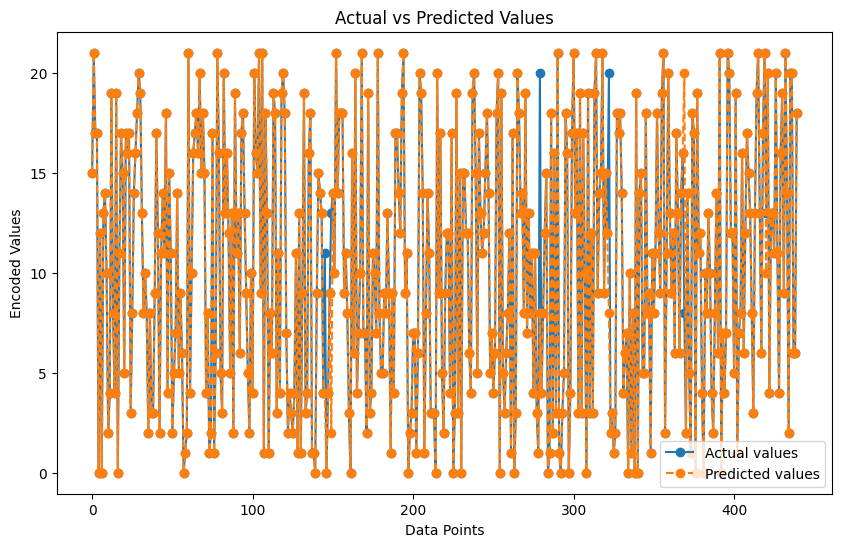

In [68]:
import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(y_test_encoded, label='Actual values', marker='o', linestyle='-')
plt.plot(y_pred_encoded, label='Predicted values', marker='o', linestyle='--')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('Encoded Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


To predict optimal soil conditions for a given crop type, you can build a machine learning model. The idea is to train the model on the available dataset with soil attributes (N, P, K, temperature, humidity, pH, rainfall) as features and the crop type as the target variable. Once the model is trained, you can use it to make predictions for optimal soil conditions for a specific crop.

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Read the CSV file into a DataFrame
df = pd.read_csv('C:/Users/mughe/Desktop/Research Work/Soil Analysis/Dataset/Crop_recommendation.csv')

# Assuming the last column is the target column
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]

# Create a LabelEncoder and fit_transform the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
Random_Forest = RandomForestClassifier(n_estimators=20, random_state=0)

# Train the model on the training set
Random_Forest.fit(X_train, y_train)

# Hypothetical values for soil attributes (you can adjust these)
N_value = 50
P_value = 25
K_value = 30
temperature_value = 25
humidity_value = 60
ph_value = 6.5
rainfall_value = 100

# Get features for the specified crop
sample_data = pd.DataFrame([[N_value, P_value, K_value, temperature_value, humidity_value, ph_value, rainfall_value]],
                            columns=X.columns)

# Use the trained model to predict the crop type
predicted_crop_encoded = Random_Forest.predict(sample_data)

# Convert the predicted label back to the original crop name
predicted_crop = label_encoder.inverse_transform(predicted_crop_encoded)

print(f"The predicted optimal soil conditions are:")
print(sample_data)
print(f"The predicted crop type is: {predicted_crop[0]}")


The predicted optimal soil conditions are:
    N   P   K  temperature  humidity   ph  rainfall
0  50  25  30           25        60  6.5       100
The predicted crop type is: mango
